In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

#Insert path here
path = ""  
dataset = path + 'mental_health.sqlite'
con = sql.connect(dataset)

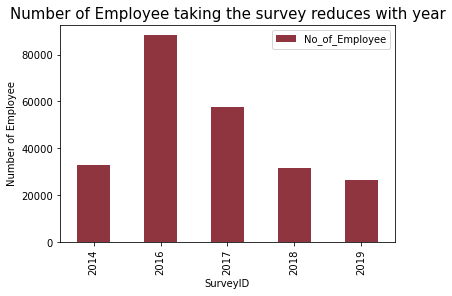

In [3]:
query = """
    SELECT
        SurveyID,
        COUNT() AS No_of_Employee
    FROM Answer
    GROUP BY SurveyID;
"""

Employee_per_survey = pd.read_sql(query, con).astype({"No_of_Employee": int})

barplot = Employee_per_survey.plot.bar(x='SurveyID',y='No_of_Employee', color = '#7A111E', alpha = 0.85)
plt.title('Number of Employee taking the survey reduces with year', fontsize = 15)
plt.ylabel('Number of Employee')
plt.xlabel('SurveyID')
plt.show()

In [19]:
sql_query="SELECT * FROM Survey"
pd.read_sql(sql_query, con)

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [80]:
sql_query="SELECT * FROM Question"
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 150)
pd.read_sql(sql_query, con)

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


In [21]:
sql_query="SELECT * FROM Answer"
pd.read_sql(sql_query, con)

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


In [124]:
sql_query="SELECT COUNT(DISTINCT UserID) FROM Answer GROUP BY SurveyID"
pd.read_sql(sql_query, con)

,COUNT(DISTINCT UserID)
0,1260
1,1433
2,756
3,417
4,352


## Identify age groups of user who submitted response

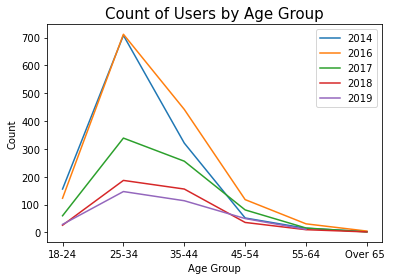

In [37]:
query = """

SELECT SurveyID,
       CASE
            WHEN AnswerText BETWEEN 18 AND 24 THEN '18-24'
            WHEN AnswerText BETWEEN 25 AND 34 THEN '25-34'
            WHEN AnswerText BETWEEN 35 AND 44 THEN '35-44'
            WHEN AnswerText BETWEEN 45 AND 54 THEN '45-54'
            WHEN AnswerText BETWEEN 55 AND 64 THEN '55-64'
            WHEN AnswerText BETWEEN 65 AND 99 THEN 'Over 65 '
        END AS age_group,
    COUNT(*) AS count
FROM Answer
WHERE QuestionID=1
      AND AnswerText >= 18

GROUP BY SurveyID, age_group
ORDER BY SurveyID, age_group;
"""
Age_Survey = pd.read_sql(query, con)
# Get a list of unique age groups in the dataframe
SurveyID_groups = Age_Survey['SurveyID'].unique()

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot a line for each age group
for SurveyID_group in SurveyID_groups:
    ax.plot(Age_Survey.loc[Age_Survey['SurveyID'] == SurveyID_group, 'age_group'], Age_Survey.loc[Age_Survey['SurveyID'] == SurveyID_group, 'count'], label=SurveyID_group)

# Set the x and y axis labels
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')

# Set the title of the plot
ax.set_title('Count of Users by Age Group',fontsize = 15)

# Show the legend
ax.legend()

# show graph
plt.show()

## Identify the gender ratio each year

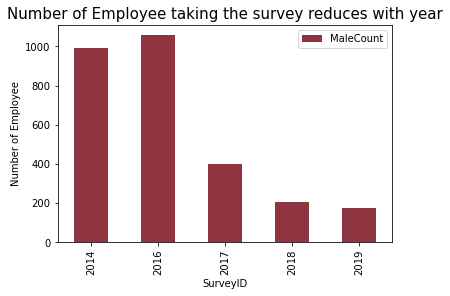

In [65]:
query = """
SELECT
    SurveyID,
    COUNT(CASE WHEN AnswerText = 'Male' THEN 1 END) AS MaleCount,
    COUNT(CASE WHEN AnswerText = 'Female' THEN 1 END) AS FemaleCount,
    COUNT(CASE WHEN AnswerText NOT IN ('Male', 'Female') OR AnswerText IS NULL THEN 1 END) AS OtherCount
FROM
    Answer
WHERE QuestionID=2
GROUP BY
    SurveyID;

"""

Employee_per_survey = pd.read_sql(query, con).astype({"MaleCount": int})

barplot = Employee_per_survey.plot.bar(x='SurveyID',y='MaleCount', color = '#7A111E', alpha = 0.85)
plt.title('Number of Employee taking the survey reduces with year', fontsize = 15)
plt.ylabel('Number of Employee')
plt.xlabel('SurveyID')
plt.show()

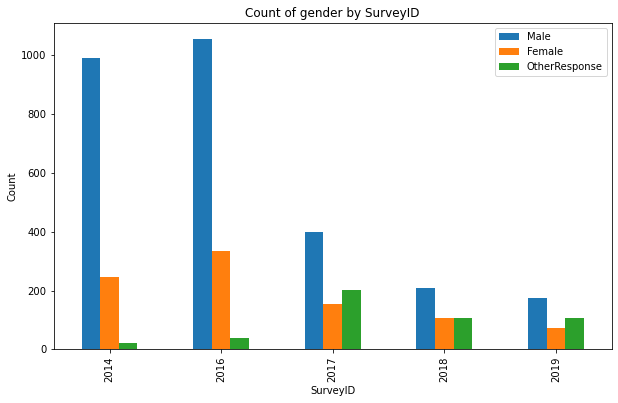

In [67]:
# Plot the bar chart
df = pd.read_sql(query, con)
ax = df.plot(x='SurveyID', kind='bar', stacked=False, figsize=(10, 6))

plt.title('Count of gender by SurveyID')
plt.xlabel('SurveyID')
plt.ylabel('Count')
plt.legend(['Male', 'Female', 'OtherResponse'])
plt.show()

In [64]:
query = """
    SELECT DISTINCT AnswerText
    FROM Answer
    WHERE QuestionID=2
    GROUP BY SurveyID;
"""
pd.read_sql(query, con)

,AnswerText
0,Female
1,Male


## Q15)
### Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?

In [3]:
query = """
    SELECT DISTINCT AnswerText
    FROM Answer
    WHERE QuestionID=15
    GROUP BY SurveyID;
"""
pd.read_sql(query, con)

,AnswerText
0,No
1,Yes


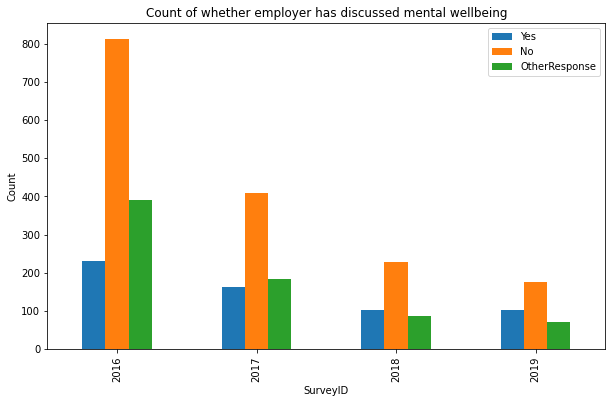

In [86]:
query = """
SELECT
    SurveyID,
    COUNT(CASE WHEN AnswerText = 'Yes' THEN 1 END) AS Y,
    COUNT(CASE WHEN AnswerText = 'No' THEN 1 END) AS N,
    COUNT(CASE WHEN AnswerText NOT IN ('Yes', 'No') OR AnswerText IS NULL THEN 1 END) AS Other
FROM
    Answer
WHERE QuestionID=15
GROUP BY
    SurveyID;

"""

# Plot the bar chart
df = pd.read_sql(query, con)
ax = df.plot(x='SurveyID', kind='bar', stacked=False, figsize=(10, 6))

plt.title('Count of whether employer has discussed mental wellbeing')
plt.xlabel('SurveyID')
plt.ylabel('Count')
plt.legend(['Yes', 'No', 'OtherResponse'])
plt.show()

## Q) 115
### what condition(s) have you been diagnosed with?

In [5]:
query = """
    SELECT DISTINCT AnswerText
    FROM Answer
    WHERE QuestionID=115
"""
pd.read_sql(query, con)

,AnswerText
0,-1
1,"Anxiety Disorder (Generalized, Social, Phobia,..."
2,"Mood Disorder (Depression, Bipolar Disorder, etc)"
3,Stress Response Syndromes
4,Substance Use Disorder
5,Obsessive-Compulsive Disorder
6,"Eating Disorder (Anorexia, Bulimia, etc)"
7,"Personality Disorder (Borderline, Antisocial, ..."
8,Attention Deficit Hyperactivity Disorder
9,Addictive Disorder


In [109]:
query = """
    SELECT DISTINCT AnswerText
    FROM Answer
    WHERE QuestionID=3
"""
pd.read_sql(query, con)

,AnswerText
0,United States
1,Canada
2,United Kingdom
3,Bulgaria
4,France
5,Portugal
6,Netherlands
7,Switzerland
8,Poland
9,Australia


In [111]:
query = """
    SELECT 
        AnswerText,
        COUNT(*) AS `num`
    FROM 
        Answer
    WHERE 
        QuestionID=3
    GROUP BY
        AnswerText
"""
pd.read_sql(query, con)

,AnswerText,num
0,-1,2
1,Afghanistan,3
2,Algeria,2
3,Argentina,4
4,Australia,73
5,Austria,10
6,"Bahamas, The",1
7,Bangladesh,3
8,Belarus,1
9,Belgium,17


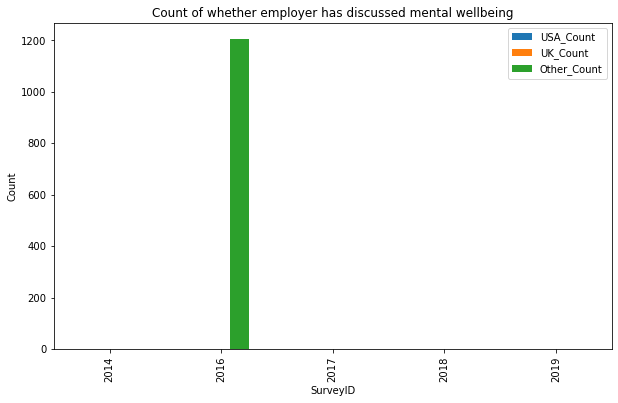

In [117]:
query = """
SELECT
    SurveyID,
    COUNT(CASE WHEN AnswerText = 'United States of America' AND QuestionID = 115 AND AnswerText NOT IN ('-1') THEN 1 END) AS USA_Count,
    COUNT(CASE WHEN AnswerText = 'United Kingdom' AND QuestionID = 115 AND AnswerText NOT IN ('-1') THEN 1 END) AS UK_Count,
    COUNT(CASE WHEN AnswerText NOT IN ('United States of America', 'United Kingdom') AND QuestionID = 115 AND AnswerText NOT IN ('-1') THEN 1 END) AS Other_Count
FROM
    Answer
GROUP BY
    SurveyID;
"""

# Plot the bar chart
df = pd.read_sql(query, con)
ax = df.plot(x='SurveyID', kind='bar', stacked=False, figsize=(10, 6))

plt.title('Count of cases of mental health')
plt.xlabel('SurveyID')
plt.ylabel('Count')
plt.legend(['USA_Count', 'UK_Count', 'Other_Count'])
plt.show()

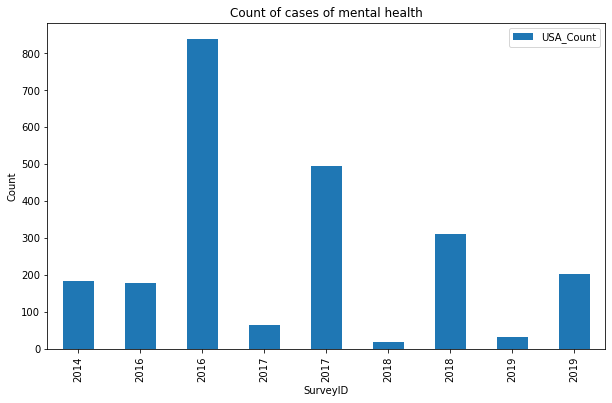

In [122]:
query = """
SELECT
    SurveyID,
    AnswerText,
    COUNT(CASE WHEN QuestionID = 3 AND AnswerText <> -1 THEN 1 END) AS NonNegativeCount
FROM
    Answer
WHERE
    AnswerText IN ('United States of America', 'United Kingdom')
GROUP BY
    SurveyID, AnswerText;
"""

# Plot the bar chart
df = pd.read_sql(query, con)
ax = df.plot(x='SurveyID', kind='bar', stacked=False, figsize=(10, 6))

plt.title('Count of cases of mental health')
plt.xlabel('SurveyID')
plt.ylabel('Count')
plt.legend(['USA_Count', 'UK_Count'])
plt.show()